In [1]:
import hipopy.hipopy as hp
import os
import pandas as pd
import os
import numpy as np
import numpy.ma as ma
import awkward as ak
from tqdm import tqdm
import torch
import torch_geometric as tg
import torch_geometric
from torch_geometric.data import Data
import torch
from torch_geometric.data import InMemoryDataset, download_url
import torch_geometric.transforms as T

#NOTE: NEW 2/20/23
from typing import List, Union

from torch_geometric.data import Data, HeteroData
from torch_geometric.data.datapipes import functional_transform
from torch_geometric.transforms import BaseTransform


# @functional_transform('normalize_features_new')
# class NormalizeFeaturesNew(BaseTransform):
#     r"""Column-normalizes the attributes given in :obj:`attrs` to sum-up to one
#     (functional name: :obj:`normalize_features`).

#     Args:
#         attrs (List[str]): The names of attributes to normalize.
#             (default: :obj:`["x"]`)
#     """
#     def __init__(self, attrs: List[str] = ["x"]):
#         self.attrs = attrs

#     def __call__(
#         self,
#         data: Union[Data, HeteroData],
#     ) -> Union[Data, HeteroData]:
#         for store in data.stores:
# #             print("DEBUGGING: store = ",store)
#             for key, value in store.items(*self.attrs):
# #                 print("DEBUGGING: key = ",key)
# #                 print("DEBUGGING: value.T = ",value.T)
#                 value = value.T - value.T.min()
#                 value.div_(value.sum(dim=-1, keepdim=True).clamp_(min=1.))
#                 store[key] = value.T
# #                 print("DEBUGGING: value.T = ",value.T)
#         return data

# @functional_transform('normalize_features_new_test')
# class NormalizeFeaturesNewTest(BaseTransform):
#     r"""Column-normalizes the attributes given in :obj:`attrs` to sum-up to one
#     (functional name: :obj:`normalize_features`).

#     Args:
#         attrs (List[str]): The names of attributes to normalize.
#             (default: :obj:`["x"]`)
#     """
#     def __init__(self, attrs: List[str] = ["x"]):
#         self.attrs = attrs

#     def __call__(
#         self,
#         data: Union[Data, HeteroData],
#     ) -> Union[Data, HeteroData]:
#         for store in data.stores:
# #             print("DEBUGGING: store = ",store)
#             for key, value in store.items(*self.attrs):
# #                 print("DEBUGGING: key = ",key)
# #                 print("DEBUGGING: value.T = ",value.T)
#                 value /=1000
# #                 value.div_(value.sum(dim=-1, keepdim=True).clamp_(min=1.))
#                 store[key] = value
# #                 print("DEBUGGING: value.T = ",value.T)
#         return data

DEBUGGING: len(dataset)  =  48382
DEBUGGING: len(dataset.data)  =  5
DEBUGGING: len(dataset.y)  =  48382
DEBUGGING: dataset.y.shape =  torch.Size([48382])
torch.Size([33, 7])
tensor([[-0.0277,  0.0076,  0.1430, -0.1876,  0.0544,  0.9807,  0.1471],
        [-0.0383,  0.0107,  0.1983, -0.1877,  0.0541,  0.9807,  0.2035],
        [-0.0608,  0.0169,  0.3056, -0.2405,  0.0648,  0.9685,  0.3134],
        [-0.0991,  0.0273,  0.4402, -0.2845,  0.0774,  0.9556,  0.4537],
        [-0.1724,  0.0472,  0.6865, -0.2844,  0.0773,  0.9556,  0.7114],
        [-0.1345,  0.0369,  0.5590, -0.2844,  0.0773,  0.9556,  0.5780],
        [-0.1384,  0.0380,  0.5721, -0.2844,  0.0773,  0.9556,  0.5918],
        [-0.1289,  0.0354,  0.5404, -0.2844,  0.0773,  0.9556,  0.5586],
        [-0.1440,  0.0395,  0.5910, -0.2844,  0.0773,  0.9556,  0.6115],
        [-0.1492,  0.0409,  0.6084, -0.2844,  0.0773,  0.9556,  0.6298],
        [-0.1537,  0.0421,  0.6234, -0.2844,  0.0773,  0.9556,  0.6455],
        [ 0.0462, -0.0

/w/hallb-scshelf2102/clas12/users/mfmce/venv_cuda/lib/python3.8/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Going through dataset
DONE


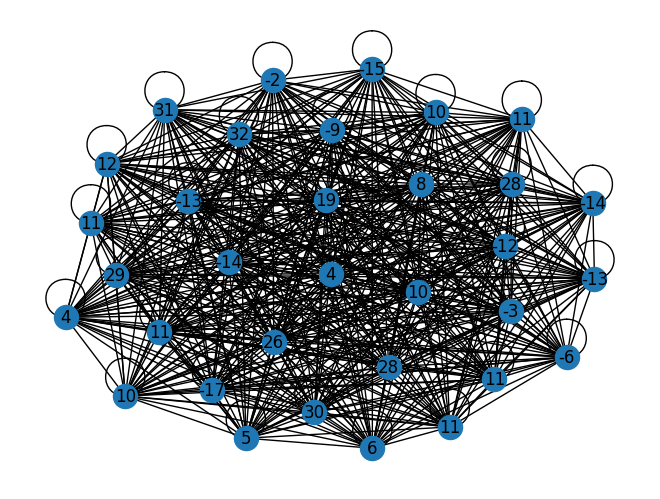

In [2]:
#TODO: DEFINE TRANSFORMS
import torch_geometric.transforms as T
# transform=T.KNNGraph(k=2) #NOTE: GRAPH.pos needs to be defined to use this
# transform=T.NormalizeFeatures()
# transform=T.Compose([T.KNNGraph(k=3,loop=False)])
# transform = T.Compose([T.KNNGraph(k=10,loop=True),NormalizeFeaturesNewTest(),T.ToUndirected(),T.AddSelfLoops()]) #T.AddSelfLoops(),
transform=None #NOTE: FOR SOME REASON T.ToUndirected() is changing the length of the graph labels??!?!?!?!?!?!RRRRRRG FRUSTRATING.
transform=T.NormalizeFeatures()
#TODO: OPEN DATASET
# import torch
# from torch_geometric.data import InMemoryDataset, download_url

# class MyOwnDataset(InMemoryDataset):
#     def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
#         super().__init__(root, transform, pre_transform, pre_filter)
#         print("INFO: self.processed_paths = ",self.processed_paths)
#         self.data, self.slices = torch.load(self.processed_paths[0])
#         print("LOADED self.data len = ",len(self.data))#DEBUGGING
#         print("LOADED self.slices len = ",len(self.slices))#DEBUGGING

#     @property
#     def raw_file_names(self):
#         return ['some_file_1', 'some_file_2']

#     @property
#     def processed_file_names(self):
#         return ['data.pt']

#     def process(self):
#         # Read data into huge `Data` list.
#         data_list = None

#         if self.pre_filter is not None:
#             data_list = [data for data in data_list if self.pre_filter(data)]

#         if self.pre_transform is not None:
#             data_list = [self.pre_transform(data) for data in data_list]

#         data, slices = self.collate(data_list)
#         torch.save((data, slices), self.processed_paths[0])

# root = '/work/clas12/users/mfmce/pyg_test_dataset_1_4_23/'
# # root = "/work/clas12/users/mfmce/pyg_datasets_lambda_rec_traj_12_11_23/" #NOTE: DATA SHOULD BE SAVED IN <root>/processed/data.pt
# # root = "/work/clas12/users/mfmce/pyg_datasets_FROM_DGL_3_22_23/"
# # root = "/work/clas12/users/mfmce/pyg_datasets_FROM_DGL_BALANCED_3_22_23/"
# # # root = "/work/clas12/users/mfmce/pyg_datasets_TEST_PIPELINE_3_22_23/"
# dataset = MyOwnDataset(root, transform=None, pre_transform=None, pre_filter=None)

import torch
from torch_geometric.data import InMemoryDataset, download_url


class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.load(self.processed_paths[0])
        # For PyG<2.4:
        # self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return ['some_file_1', 'some_file_2']

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        # Read data into huge `Data` list.
        data_list = None

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        self.save(data_list, self.processed_paths[0])
        # For PyG<2.4:
        # torch.save(self.collate(data_list), self.processed_paths[0])

# Create PyG Dataset
root = '/work/clas12/users/mfmce/pyg_test_rec_traj_dataset_1_8_23/'
dataset = MyOwnDataset(
            root,
            transform=None,
            pre_transform=None,
            pre_filter=None
        )
# DEBUGGING=True
# if DEBUGGING:
#     from torch_geometric.datasets import TUDataset
#     dataset = TUDataset(root='/home/mfmce/drop', name='MUTAG')
# print("DEBUGGING: len(dataset) = ",len(dataset))
data = dataset[0]
print('DEBUGGING: len(dataset)  = ',len(dataset))
print('DEBUGGING: len(dataset.data)  = ',len(dataset.data))
print('DEBUGGING: len(dataset.y)  = ',len(dataset.y))
print('DEBUGGING: dataset.y.shape = ',dataset.y.shape)
# print(data.x)
# print(dataset)
# if transform is not None: print(transform(dataset[0]).edge_index)
# if transform is not None: print(transform(dataset[0]).x)
print(data.x.shape)
print(data.x)
# print(data.x[0])
# print(data.x[0].sum())
print(data.y.shape)
print(data.y)
print("DEBUGGING: data.x.dtype = ",data.x.dtype)
print("DEBUGGING: data.y.dtype = ",data.y.dtype)
print("DEBUGGING: data.kinematics.dtype = ",data.kinematics.dtype)
print("DEBUGGING: data.y.shape = ",data.y.shape)
print("DEBUGGING: data.y = ",data.y)
g = tg.utils.to_networkx(data,to_undirected=True)
import networkx as nx
node_labels = {i:int(val.item()*100) for i, val in enumerate(data.x[:,0])}
nx.draw(g,labels=node_labels)
print("Going through dataset")
for idx, d in enumerate(dataset):
    if d.y.shape[0]>2:
        print("d.y = ",d.y)
        print("idx = ",idx)
    if torch.any(torch.isnan(d.x)):
        print("DEBUGGING: nan @ idx, d = ",idx,d)
    if torch.any(torch.isinf(d.x)):
        print("DEBUGGING: nan @ idx, d = ",idx,d)
        
print("DONE")

In [3]:
# # Optionally use benchmark dataset
# from torch_geometric.datasets import TUDataset
# !ls -lrth /home/mfmce/drop/MUTAG
# dataset = TUDataset(root='/home/mfmce/drop/MUTAG', name='MUTAG')
# print(len(dataset))
# print(dataset[1].y)

DEBUGGING: dataset[0].y[0].item()== 0 =  True
torch.Size([241826, 7])
torch.Size([5076])
torch.Size([2223339, 7])
torch.Size([43306])
DEBUGGING: b_sig.y.shape =  torch.Size([5076])
DEBUGGING; b_bg.y.shape =  torch.Size([43306])
DEBUGGING: type(arr1) =  <class 'numpy.ndarray'>
DEBUGGING: arr1.shape =  (5240, 11)
DEBUGGING: arr2.shape =  (44604, 11)
DEBUGGING: b_sig.x.dtype =  torch.float32
DEBUGGING: b_bg.x.dtype  =  torch.float32
DEBUGGING: b_sig.kinematics[0].dtype =  torch.float32


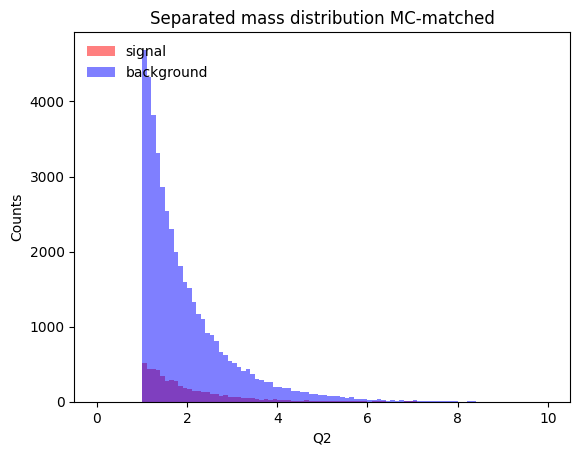

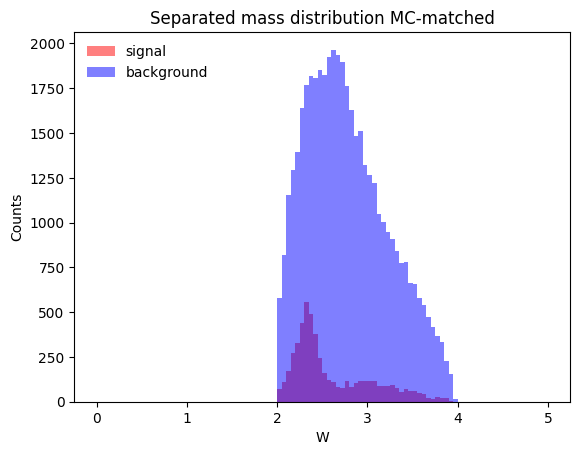

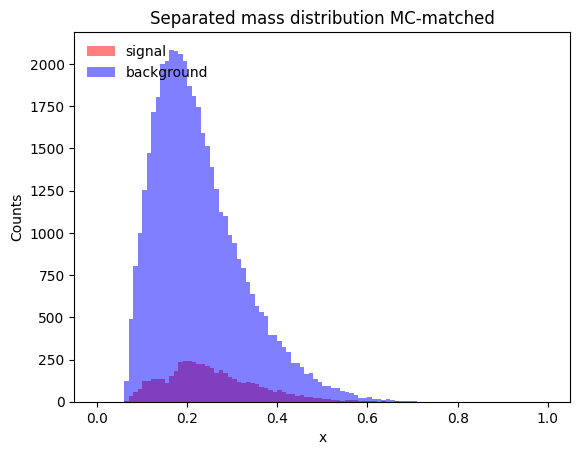

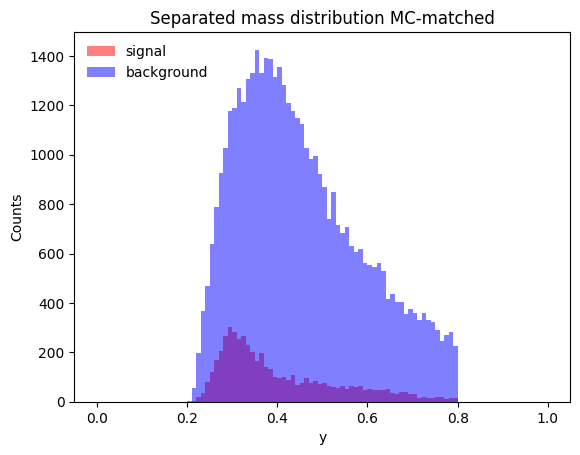

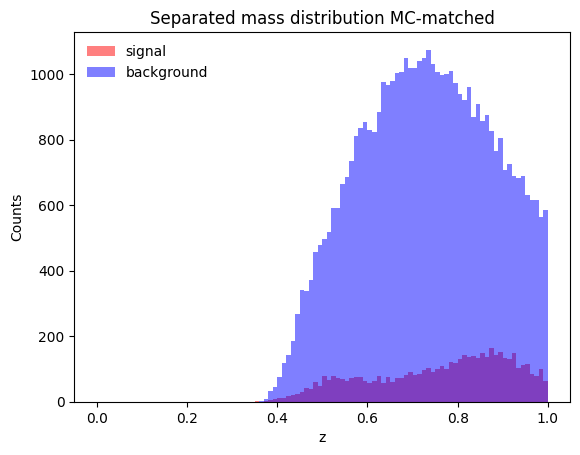

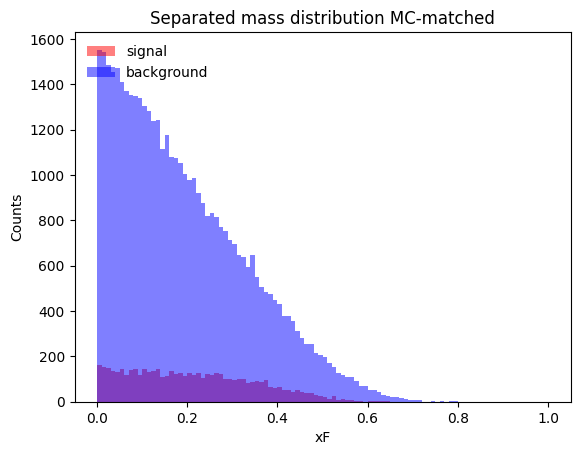

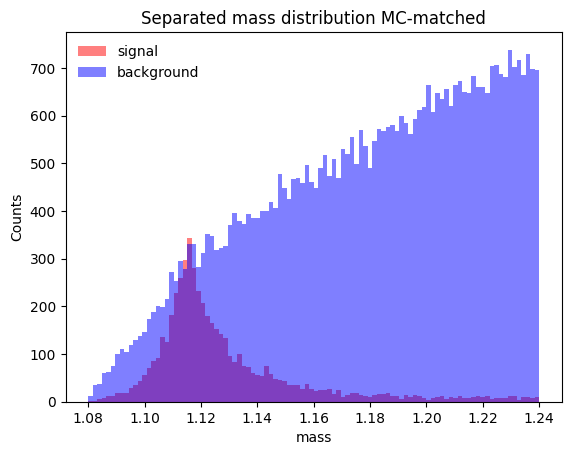

In [4]:
l_sig = []
l_bg = []
print("DEBUGGING: dataset[0].y[0].item()== 0 = ",dataset[0].y[0].item()==0)
for data in dataset:
#     if len(data.y)!=2: print("DEBUGGING: len(data.y) = ",len(data.y))
    if data.y[0].item()==1:
        l_sig.append(data)
    else:
        l_bg.append(data)
b_sig = torch_geometric.data.Batch().from_data_list(l_sig)
b_bg = torch_geometric.data.Batch().from_data_list(l_bg)
print(b_sig.x.shape)
print(b_sig.y.shape)
print(b_bg.x.shape)
print(b_bg.y.shape)

import matplotlib.pyplot as plt

def plot_data_separated(array_sig,array_bg,title=None,xlabel='index',nbins=100,low=-1.1,high=1.1):
    
    array_sig = array_sig.flatten()
    array_bg = array_bg.flatten()

    # Plot MC-Matched distributions
    f = plt.figure()
    if title != None:
        plt.title(title)
    plt.title('Separated mass distribution MC-matched')
    plt.hist(array_sig, color='r', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='signal')
    plt.hist(array_bg, color='b', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='background')
    plt.legend(loc='upper left', frameon=False)
    plt.ylabel('Counts')
    plt.xlabel(xlabel)
#     f.savefig(xlabel+'_separated_'+todays_date+'.png')
    plt.show()
    
arr1 = b_sig.kinematics
arr2 = b_bg.kinematics

print("DEBUGGING: b_sig.y.shape = ",b_sig.y.shape)
print("DEBUGGING; b_bg.y.shape = ",b_bg.y.shape)
    
# arr1 = []
# for el in b_sig.kinematics:
#     arr1.extend(el)
# arr2 = []
# for el in b_bg.kinematics:
#     arr2.extend(el)

arr1 = np.array(arr1)
arr2 = np.array(arr2)

print("DEBUGGING: type(arr1) = ",type(arr1))
print("DEBUGGING: arr1.shape = ",arr1.shape)
print("DEBUGGING: arr2.shape = ",arr2.shape)

print("DEBUGGING: b_sig.x.dtype = ",b_sig.x.dtype)
print("DEBUGGING: b_bg.x.dtype  = ",b_bg.x.dtype)

print("DEBUGGING: b_sig.kinematics[0].dtype = ",b_sig.kinematics[0].dtype)
    
# Plot data separated distributions
plot_data_separated(arr1[:,3],arr2[:,3],xlabel="Q2",low=0.0,high=10.0)
plot_data_separated(arr1[:,5],arr2[:,5],xlabel="W",low=0.0,high=5.0)
plot_data_separated(arr1[:,6],arr2[:,6],xlabel="x",low=0.0,high=1.0)
plot_data_separated(arr1[:,7],arr2[:,7],xlabel="y",low=0.0,high=1.0)
plot_data_separated(arr1[:,8],arr2[:,8],xlabel="z",low=0.0,high=1.0)
plot_data_separated(arr1[:,9],arr2[:,9],xlabel="xF",low=0.0,high=1.0)
plot_data_separated(arr1[:,10],arr2[:,10],xlabel="mass",low=1.08,high=1.24)
# plot_data_separated(arr1[:,4],arr2[:,4],xlabel="chi2")
# plot_data_separated(arr1[:,5],arr2[:,5],xlabel="pid")
# plot_data_separated(arr1[:,6],arr2[:,6],xlabel="status")

In [5]:
#TODO: CREATE MODEL
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GraphConv
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn.norm import GraphNorm, BatchNorm

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
#         torch.manual_seed(12345)
        self.conv1 = GCNConv(in_channels, hidden_channels)#.jittable() #NOTE: NEEDED FOR DEPLOYMENT IN CMAKE
        self.conv2 = GCNConv(hidden_channels, hidden_channels)#.jittable()
        self.conv3 = GCNConv(hidden_channels, hidden_channels)#.jittable()
        self.lin1 = Linear(hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, hidden_channels)
        self.lin3 = Linear(hidden_channels, out_channels)
        self.bn1 = torch_geometric.nn.norm.GraphNorm(hidden_channels)
        self.bn2 = torch_geometric.nn.norm.GraphNorm(hidden_channels)
        self.bn3 = torch_geometric.nn.norm.GraphNorm(hidden_channels)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
#         print("x = ",x)
#         print("DEBUGGING: in GCN: begin: x.requires_grad = ",x.requires_grad)
        x = self.conv1(x, edge_index)
#         print("DEBUGGING: in GCN: self.conv1(x, edge_index): x.requires_grad = ",x.requires_grad)
        x = self.bn1(x)
#         print("DEBUGGING: in GCN: self.bn2(x): x.requires_grad = ",x.requires_grad)
#         print("self.conv1(x,edge_index) = ",x)
        x = x.relu()
#         x = torch.nn.function.elu(x)
#         print("DEBUGGING: in GCN: x.relu(): x.requires_grad = ",x.requires_grad)
#         print("x.relu() = ",x)
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
#         print("DEBUGGING: in GCN: self.bn2(x): x.requires_grad = ",x.requires_grad)
#         print("self.conv2(x,edge_index) = ",x)
        x = x.relu()
#         print("x.relu() = ",x)
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
#         print("self.conv3(x,edge_index) = ",x)
#         print("DEBUGGING: in GCN: self.bn3(x): x.requires_grad = ",x.requires_grad)

#         # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
#         print("self.conv2(global_mean_pool(x, batch)) = ",x)
#         print("DEBUGGING: in GCN: global_mean_pool(x): x.requires_grad = ",x.requires_grad)

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
#         print("DEBUGGING: in GCN: F.dropout: x.requires_grad = ",x.requires_grad)
#         print("F.dropout(x, p=0.5, training=self.training) = ",x)
        x = self.lin1(x)
        x = self.lin2(x)
        x = self.lin3(x)
#         print("DEBUGGING: in GCN: self.lin*(x): x.requires_grad = ",x.requires_grad)
#         print("self.lin3(x) = ",x)
#         x = torch.sigmoid(x) #NOTE: DON'T SOFTMAX IF USING BCELOSS, USE SIGMOID INSTEAD
#         print("torch.sigmoid(x) = ",x)
#         print("DEBUGGING: in GCN: torch.sigmoid(x): x.requires_grad = ",x.requires_grad)
        return x


import os.path as osp

import torch
import torch.nn.functional as F

import torch_geometric
import torch_geometric.transforms as T
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MLP, GINConv, global_add_pool
from torch_geometric.nn.norm import GraphNorm
from torch.nn import BatchNorm1d

class GIN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.convs = torch.nn.ModuleList()
        self.bns   = torch.nn.ModuleList()
        hidden_dim = 128 #hidden_dim
        num_layers = 8 # num_layers
        self.num_layers = num_layers
        
        for _ in range(self.num_layers - 1):
            mlp = MLP([in_channels if _==0 else hidden_dim, hidden_dim, hidden_dim, hidden_dim],norm='batch_norm',act='relu') #NOTE ADDED EXTRA LAYER HERE
            self.convs.append(GINConv(mlp, train_eps=False))
            self.bns.append(BatchNorm1d(hidden_dim))
#             in_channels = hidden_dim

        self.mlps = torch.nn.ModuleList()
        for _ in range(self.num_layers): #NOTE: INPUT DIM FOR MLP LAYER HAS TO MATCH INPUT DIM FOR EACH GRAPH REPRESENTATION IN EACH LAYER HERE
            self.mlps.append(MLP([in_channels if _==0 else hidden_dim, hidden_dim, hidden_dim, out_channels], norm=None, dropout=0.0, act='relu')) #NOTE ADDED EXTRA LAYER HERE AND..-> CHANGED ACTIVATION FUNCTION FROM DEFAULT RELU

    def forward(self, x, edge_index, batch): #data):
        #x, edge_index, batch = data.x, data.edge_index, data.batch
        hidden_rep = [x]
        for i in range(self.num_layers - 1):
#             print("x = ",x.max().item(),x.min().item(),x.mean().item(),x.std().item())
            x = self.convs[i](x, edge_index)
#             print("x = conv(x, edge_index) = ",x.max().item(),x.min().item(),x.mean().item(),x.std().item())
#             print("i = ",i)
            x = self.bns[i](x)
#             print("x = bn(x) = ",x.max().item(),x.min().item(),x.mean().item(),x.std().item())
#             x = x.elu() #x.tanh() #x.relu()
            x = torch.nn.functional.relu(x)
#             print("x = x.relu() = ",x.max().item(),x.min().item(),x.mean().item(),x.std().item())
            hidden_rep.append(x)
#             raise RunTimeError
        score_over_layer = 0
        for i, h in enumerate(hidden_rep):
            pooled_h = global_add_pool(h,batch)
#             print("i, pooled_h = ",i," , ",pooled_h.max().item(),pooled_h.min().item(),pooled_h.mean().item(),pooled_h.std().item())
            newval = self.mlps[i](pooled_h)
            score_over_layer += newval#self.mlps[i](pooled_h)
#             print("self.mlps[i](pooled_h) = ",newval)
#             print("softmax(...) = ",torch.nn.functional.softmax(newval,dim=-1))
#         raise TypeError
        return score_over_layer

'''
    ParticleNet Implementation
'''

class ParticleStaticEdgeConv(torch_geometric.nn.MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(ParticleStaticEdgeConv, self).__init__(aggr='max')
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(2 * in_channels, out_channels[0], bias=False),
            torch_geometric.nn.BatchNorm(out_channels[0]), 
            torch.nn.ReLU(),
            torch.nn.Linear(out_channels[0], out_channels[1], bias=False),
            torch_geometric.nn.BatchNorm(out_channels[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(out_channels[1], out_channels[2], bias=False),
            torch_geometric.nn.BatchNorm(out_channels[2]),
            torch.nn.ReLU()
        )

    def forward(self, x, edge_index, k):
        
        return self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x)

    def message(self, edge_index, x_i, x_j):
        tmp = torch.cat([x_i, x_j - x_i], dim = 1)

        out_mlp = self.mlp(tmp)

        return out_mlp

    def update(self, aggr_out):
        return aggr_out

class ParticleDynamicEdgeConv(ParticleStaticEdgeConv):
    def __init__(self, in_channels, out_channels, k=7):
        super(ParticleDynamicEdgeConv, self).__init__(in_channels, out_channels)
        self.k = k
        self.skip_mlp = torch.nn.Sequential(
            torch.nn.Linear(in_channels, out_channels[2], bias=False),
            torch_geometric.nn.BatchNorm(out_channels[2]),
        )
        self.act = torch.nn.ReLU()

    def forward(self, pts, fts, batch=None):
        edges = torch_geometric.nn.knn_graph(pts, self.k, batch, loop=False, flow=self.flow)
        aggrg = super(ParticleDynamicEdgeConv, self).forward(fts, edges, self.k)
        x = self.skip_mlp(fts)
        out = torch.add(aggrg, x)
        return self.act(out)


# class ParticleNet(torch.nn.Module):

#     def __init__(self, settings):
#         super().__init__()
#         previous_output_shape = settings['input_features']

#         self.input_bn = torch_geometric.nn.BatchNorm(settings['input_features'])

#         self.conv_process = torch.nn.ModuleList()
#         for layer_idx, layer_param in enumerate(settings['conv_params']):
#             K, channels = layer_param
#             self.conv_process.append(ParticleDynamicEdgeConv(previous_output_shape, channels, k=K).to(settings['device']))#NOTE: Originally : .to(DEVICE)
#             previous_output_shape = channels[-1]



#         self.fc_process = torch.nn.ModuleList()
#         for layer_idx, layer_param in enumerate(settings['fc_params']):
#             drop_rate, units = layer_param
#             seq = torch.nn.Sequential(
#                 torch.nn.Linear(previous_output_shape, units),
#                 torch.nn.Dropout(p=drop_rate),
#                 torch.nn.ReLU()
#             ).to(settings['device'])#NOTE: Originally : .to(DEVICE)
#             self.fc_process.append(seq)
#             previous_output_shape = units


#         self.output_mlp_linear = torch.nn.Linear(previous_output_shape, settings['output_classes'])
#         self.output_activation = torch.nn.Softmax(dim=1)

#     def forward(self, batch):
#         fts = self.input_bn(batch.x)
#         pts = batch.pos

#         for idx, layer in enumerate(self.conv_process):
#             fts = layer(pts, fts, batch.batch)
#             pts = fts

#         x = torch_geometric.nn.global_mean_pool(fts, batch.batch)

#         for layer in self.fc_process:
#             x = layer(x)

#         x = self.output_mlp_linear(x)
# #         x = self.output_activation(x)
#         return x

# settings = {
#     "conv_params": [
#         (2, (64, 64, 64)),
#         (2, (64, 64, 64)),
# #         (2, (64, 64, 256)),
# #         (16, (64, 64, 64)),
# #         (16, (128, 128, 128)),
# #         (16, (256, 256, 256)),
#     ],
#     "fc_params": [
#         (0.5, 64)
# #         (0.1, 256)
#     ],
#     "input_features": dataset.num_node_features, # default was 4 (e, px, py, pz)
#     "output_classes": dataset.num_classes,       # default was 2
#     "device":device
# }

# # model = ParticleNet(settings)
# # # model = model.to(DEVICE)

# # print(model)

# model = GCN(dataset.num_node_features,64,2)
# # model = GIN(in_channels=dataset.num_node_features,out_channels=2)
# print(model)
# print("\ndataset[0].pos = ",dataset[0].pos)

In [6]:
#TODO: PUT MODEL ON DEVICE
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Device = ",device)
# model = model.to(device)
print("DEBUGGING: torch.cuda.is_available() = ",torch.cuda.is_available())

Device =  cuda:0
DEBUGGING: torch.cuda.is_available() =  True


In [7]:
#TODO: SPLIT DATASET
from torch.utils.data import random_split #TODO: SEE IF YOU CAN USE THIS
# torch.manual_seed(12345)
print('DEBUGGING: BEFORE: dataset.y.shape = ',dataset.y.shape)
dataset = dataset.shuffle()
print('DEBUGGING: AFTER:  dataset.y.shape = ',dataset.y.shape)

print(len(dataset))

fracs = [0.8, 0.1, 0.1] #NOTE: SHOULD CHECK np.sum(fracs) == 1 and len(fracs)==3
fracs = [torch.sum(torch.tensor(fracs[:idx])) for idx in range(1,len(fracs)+1)]
print(fracs)
split1, split2 = [int(len(dataset)*frac) for frac in fracs[:-1]]
train_dataset = dataset[:split1]
val_dataset = dataset[split1:split2]
test_dataset = dataset[split2:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of validation graphs: {len(val_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

print("train_dataset")
for idx, d in enumerate(train_dataset):
    if d.y.shape[0]>2:
        print("d.y = ",d.y)
        print("idx = ",idx)
        
print("val_dataset")
for idx, d in enumerate(val_dataset):
    if d.y.shape[0]>2:
        print("d.y = ",d.y)
        print("idx = ",idx)
        
print("test_dataset")
for idx, d in enumerate(test_dataset):
    if d.y.shape[0]>2:
        print("d.y = ",d.y)
        print("idx = ",idx)

DEBUGGING: BEFORE: dataset.y.shape =  torch.Size([48382])
DEBUGGING: AFTER:  dataset.y.shape =  torch.Size([48382])
48382
[tensor(0.8000), tensor(0.9000), tensor(1.)]
Number of training graphs: 38705
Number of validation graphs: 4838
Number of test graphs: 4839
train_dataset
val_dataset
test_dataset


In [8]:
#TODO: CREATE DATALOADERS
from torch_geometric.loader import DataLoader
from torch.utils.data import WeightedRandomSampler
print("DEBUGGING: train_dataset.y.shape = ",train_dataset.y.shape)
_, train_counts = np.unique(train_dataset.y, return_counts=True)
print("DEBUGGING: np.unique(train_dataset) = ",_,train_counts)
train_weights = [1/train_counts[i] for i in train_dataset.y]
train_sampler = WeightedRandomSampler(weights=train_weights, num_samples=len(train_dataset), replacement=True)
_, val_counts = np.unique(val_dataset.y, return_counts=True)
print("DEBUGGING: np.unique(val_dataset) = ",_,val_counts)
val_weights = [1/val_counts[i] for i in val_dataset.y]
val_sampler = WeightedRandomSampler(weights=val_weights, num_samples=len(val_dataset), replacement=True)
_, test_counts = np.unique(test_dataset.y, return_counts=True)
print("DEBUGGING: np.unique(test_dataset) = ",_,test_counts)
test_weights = [1/test_counts[i] for i in test_dataset.y]
test_sampler = WeightedRandomSampler(weights=test_weights, num_samples=len(test_dataset), replacement=True)

batch_size = 32
use_weighted_samplers = False
if not use_weighted_samplers:
    train_sampler, val_sampler, test_sampler = None, None, None
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size, shuffle=False)#, drop_last=True)
val_loader = DataLoader(val_dataset, sampler=val_sampler, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)#NOTE: #TODO: Try no sampling here for evaluation...

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()
    break

# print("train_loader")
# for idx, d in enumerate(train_loader):
#     if d.y.shape[0]!=batch_size:
#         print("d.y = ",d.y)
#         print("idx = ",idx)
        
# print("val_loader")
# for idx, d in enumerate(val_loader):
#     if d.y.shape[0]!=batch_size:
#         print("d.y = ",d.y)
#         print("idx = ",idx)
        
# print("test_loader")
# for idx, d in enumerate(test_loader):
#     if d.y.shape[0]!=batch_size:
#         print("d.y = ",d.y)
#         print("idx = ",idx)

DEBUGGING: train_dataset.y.shape =  torch.Size([38705])
DEBUGGING: np.unique(train_dataset) =  [0 1] [34685  4020]
DEBUGGING: np.unique(val_dataset) =  [0 1] [4323  515]
DEBUGGING: np.unique(test_dataset) =  [0 1] [4298  541]
Step 1:
Number of graphs in the current batch: 32
DataBatch(x=[1541, 7], edge_index=[2, 81393], y=[32], kinematics=[32, 11], rec_indices=[64], batch=[1541], ptr=[33])



In [9]:
# # Instantiate model, optimizer, and loss function
# model = GCN(dataset.num_node_features,64,dataset.num_classes).to(device)
# Compile model
# model = torch_geometric.compile(model, dynamic=True)#NOTE: Not sure why this throws error now...
print("DEBUGGING: dataset.num_classes")
model = GIN(dataset.num_node_features, dataset.num_classes).to(device)
print("DEBUGGING: dataset.num_classes = ",dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
print("DEBUGGING: y[0] = ",torch_geometric.data.Batch().from_data_list(train_dataset).y[0])
print("DEBUGGING: len(train_dataset) = ",len(train_dataset))
print("DEBUGGING: len(batch(t_ds)) = ",len(torch_geometric.data.Batch().from_data_list(train_dataset)))
print("DEBUGGING: y.shape = ",torch_geometric.data.Batch().from_data_list(train_dataset).y.shape)
print("DEBUGGING: y[0:10] = ",torch_geometric.data.Batch().from_data_list(train_dataset).y[0:10])
# data_labels = torch_geometric.data.Batch().from_data_list(train_dataset).y[:,0] #NOTE: THIS IS FOR 2D Labels
data_labels = train_dataset.y
unique, counts = np.unique(data_labels,return_counts=True)
print("DEBUGGING: unique, counts = ",unique,counts)
weight_signal = counts[1]/counts[0]#DEBUGGING MULTIPLY BY 2 ...
print("weight_signal = ",weight_signal)
weight = torch.FloatTensor([weight_signal, 1.0]).to(device) #NOTE: That labels are [sg?,bg?] so label 0 in this case is sg and label 1 is bg.
print("DEBUGGING: weight = ",weight)
criterion = torch.nn.CrossEntropyLoss(weight=weight,reduction='mean')

DEBUGGING: dataset.num_classes
DEBUGGING: dataset.num_classes =  2
DEBUGGING: y[0] =  tensor(1)
DEBUGGING: len(train_dataset) =  38705
DEBUGGING: len(batch(t_ds)) =  38705
DEBUGGING: y.shape =  torch.Size([38705])
DEBUGGING: y[0:10] =  tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])
DEBUGGING: unique, counts =  [0 1] [34685  4020]
weight_signal =  0.11590024506270723
DEBUGGING: weight =  tensor([0.1159, 1.0000], device='cuda:0')


In [10]:
# # data_labels = torch_geometric.data.Batch().from_data_list(dataset).y
# # unique, counts = np.unique(data_labels,return_counts=True)
# weight_signal = counts[0]/counts[1]
# print(weight_signal)

In [11]:
# Define training and testing routines
def train():
    model.train()

    for idx, data in tqdm(enumerate(train_loader)):  # Iterate in batches over the training dataset.
        data = data.to(device)
        optimizer.zero_grad()  # Clear gradients.
#         x = data.x
#         y = data.y
#         if batch_size!=y.shape[0]:
#             print("DEBUGGING: x.shape = ",x.shape)
#             print("DEBUGGING: len(x) = ",len(x))
#             print("DEBUGGING: y.shape = ",y.shape)
#             print("DEBUGGING: len(y) = ",len(y))
# #             print("DEBUGGING: x = ",x)
#             print("DEBUGGING: y = ",y)
#             print("DEBUGGING: idx = ",idx)
# #             print("DEBUGGING: edge_index = ",data.edge_index)
# #         edge_index = data.edge_index
# #         batch = data.batch
        out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
#         out = torch.nn.functional.softmax(out,dim=-1)
#         print("DEBUGGING: out.dtype = ",out.dtype)
#         print("DEBUGGING: data.y.dtype = ",data.y.dtype)
#         print("DEBUGGING: out.shape = ",out.shape)
#         print("DEBUGGING: data.y.shape = ",data.y.shape)
#         print("DEBUGGING: out = ",out)
#         print("DEBUGGING: y   = ",data.y)
#         print("DEBUGGING: y.shape   = ",data.y.shape)
#         break
#         print("DEBUGGING: out.device = ",out.device)
#         print("DEBUGGING: data.y.device = ",data.y.device)
#         print("DEBUGGING: device = ",device)
#         print("DEBUGGING: out.shape = ",out.shape)
#         print("DEBUGGING: data.y.shape = ",data.y.shape)
#         print("DEBUGGING: out.dtype = ",out.dtype)
#         print("DEBUGGING: data.y.dtype = ",data.y.dtype)
        loss = criterion(out, data.y)  # Compute the loss.
#         break#DEBUGGING!
#         out = torch.nn.functional.softmax(out,dim=-1)
#         pred = out.argmax(dim=1)  # Use the class with highest probability.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
#         optimizer.zero_grad()  # Clear gradients.
        
from sklearn.metrics import confusion_matrix
@torch.no_grad()
def test(loader):
    model.eval()
#     for name, param in model.named_parameters():
#         if 'weight' in name:
#             print("DEBUGGING: name, param = ",name,param)
    correct = 0
    loss_ = 0
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    decisions = []
    outputs = []
    y_true = []
    for data in tqdm(loader):  # Iterate in batches over the training/test dataset.
        data = data.to(device)
        out = model(data.x, data.edge_index, data.batch)
#         out = torch.nn.functional.softmax(out,dim=-1)
        loss = criterion(out, data.y)
        loss_ += loss.item()
        out = torch.nn.functional.softmax(out,dim=-1)
        pred = out.argmax(dim=1)  # Use the class with highest probability.
#         print("DEBUGGING: np.unique(pred, return_counts=True) = ",np.unique(pred.cpu(),return_counts=True))
#         print("DEBUGGING: pred.shape = ",pred.shape)
#         print("DEBUGGING: data.y.shape = ",data.y.shape)
        correct += int((pred == data.y).sum())  # Check against ground-truth labels. #NOTE: THAT NEED index :,1 since labels are 0,1 (pred==1) if bg and 1,0 (pred==0) if true
#         tp += int(torch.logical_and(pred==data.y,pred==1).sum())#NOTE: THIS ONLY WORKS FOR BINARY CLASSIFICATION
#         fp += int(torch.logical_and(pred!=data.y,pred==1).sum())
#         fn += int(torch.logical_and(pred!=data.y,pred==0).sum())
#         tn += int(torch.logical_and(pred==data.y,pred==0).sum())
        cm = confusion_matrix(data.y.cpu(),pred.cpu(),labels=[0,1]) #NOTE: SAME INDEXING DOWN HEREE AS WHEN ASSIGNING CORRECT ABOVE.
        tp += cm[1,1]
        fp += cm[0,1] # bg classified as sig is 0,1
        fn += cm[1,0] # signal classified as bg is 1,0
        tn += cm[0,0]
        
        outputs.extend(out.cpu())
        decisions.extend(pred.cpu())
        y_true.extend(data.y.cpu())
        
    precision = tp / (tp + fp) # accuracy of the identified signal events
    recall = tp / (tp + fn) # efficiency
    precision_n = tn / (tn + fn)
    recall_n = tn / (tn + fp)
#     print("tp = ",tp)
#     print("fp = ",fp)
#     print("fn = ",fn)
#     print("tn = ",tn)
#     print("len(loader.dataset) = ",len(loader.dataset))
#     print("acc = ",correct/len(loader.dataset))
#     print("(tp+tn)/(tp+fp+tn+fn) = ",(tp+tn)/(tp+fp+tn+fn))
    return correct / len(loader.dataset), loss_ / len(loader.dataset), precision, recall, precision_n, recall_n, outputs, decisions, y_true # Derive ratio of correct predictions.

# acc, loss = test(train_loader)
# print(acc,loss)
# acc, loss = test(val_loader)
# print(acc, loss)

In [ ]:
# Train model batch size 64 lr 0.001
nepochs = 30
train_metrics = {"acc":[], "loss":[], "precision":[], "recall":[]}
val_metrics = {"acc":[], "loss":[], "precision":[], "recall":[]}
# for name, param in model.named_parameters():
#     if 'weight' in name:
#         print("DEBUGGING: name, param = ",name,param)
#     break
for epoch in range(nepochs):
    print("BEFORE TRAIN()")
    train()
    print("BEFORE TEST(TRAIN_LOADER)")
    train_acc, train_loss, train_precision, train_recall, train_precision_n, train_recall_n, _, _, __ = test(train_loader)
    train_metrics["acc"].append(train_acc)
    train_metrics["loss"].append(train_loss)
    train_metrics["precision"].append(train_precision)
    train_metrics["recall"].append(train_recall)
    print("BEFORE TEST(VAL_LOADER)")
    val_acc, val_loss, val_precision, val_recall, val_precision_n, val_recall_n, _, _, __ = test(val_loader)
    val_metrics["acc"].append(val_acc)
    val_metrics["loss"].append(val_loss)
    val_metrics["precision"].append(val_precision)
    val_metrics["recall"].append(val_recall)
    print("Epoch ",epoch," Train acc: ",train_acc," loss: ",train_loss," precision: ",train_precision," recall: ",train_recall)#," precision_n: ",train_precision_n," recall_n: ",train_recall_n)
    print("Epoch ",epoch," Val   acc: ",val_acc,  " loss: ",val_loss," precision: ",val_precision," recall: ",val_recall)#," precision_n: ",val_precision_n," recall_n: ",val_recall_n)
# for name, param in model.named_parameters():
#     if 'weight' in name:
#         print("DEBUGGING: name, param = ",name,param)
#     break
import matplotlib.pyplot as plt
epochs = [i for i in range(len(train_metrics["loss"]))]
f = plt.figure()
ymax = max(max(train_metrics['loss']),max(val_metrics['loss']))
ymax = 0.01 #max(max(train_metrics['loss']),max(val_metrics['loss']))
print("ymax = ",ymax)
plt.ylim((10**-3,10**-1))
plt.semilogy(epochs, train_metrics['loss'], color='tab:orange', linewidth=2, markersize=1, label="training loss")
plt.semilogy(epochs, val_metrics['loss'], color='tab:blue', linewidth=2, markersize=1, label="training loss")
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Arbitrary units')
plt.show()

f = plt.figure()
plt.ylim(1e-5,1)
plt.plot(epochs, train_metrics['acc'], color='tab:orange', linewidth=2, markersize=1, label="training accuracy")
plt.plot(epochs, val_metrics['acc'], color='tab:blue', linewidth=2, markersize=1, label="validation accuracy")
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Arbitrary units')
plt

f = plt.figure()
plt.ylim(0,1)
plt.plot(epochs, train_metrics['precision'], color='tab:orange', linewidth=2, markersize=1, label="training precision")
plt.plot(epochs, val_metrics['precision'], color='tab:blue', linewidth=2, markersize=1, label="validation precision")
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Arbitrary units')
plt.show()


f = plt.figure()
plt.ylim(0,1)
plt.plot(epochs, train_metrics['recall'], color='tab:orange', linewidth=2, markersize=1, label="training recall")
plt.plot(epochs, val_metrics['recall'], color='tab:blue', linewidth=2, markersize=1, label="validation recall")
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Arbitrary units')
plt.show()
#NOTE: ALSO TRY CATBOOST WITH NEW VERTEXING
#NOTE: ALSO TRY GIN/PNet WITH NEW VERTEXING
#NOTE: SEE BELOW FIRST: CAN ALSO IMPLEMENT IN PL SO YOU CAN USE MULTIPLE GPUs
#NOTE: THIS WILL TAKE ROUGHLY 21min for 497000 training samples without GPU so just install GPU version of pytorch and save time.

BEFORE TRAIN()


0it [00:00, ?it/s]

100%|███████████████████████████████████████| 152/152 [00:01<00:00, 101.02it/s]


precision2 =  0.18945102260495156
precision =  0.18945102260495156
recall2 =  0.3527054108216433
recall =  0.3527054108216433
precision_n =  0.9173913043478261
recall_n =  0.8264976958525345
DEBUGGING: len(outputs)    =  4839
DEBUGGING: outputs[0:10]   =  [tensor([0.6514, 0.3486]), tensor([0.7780, 0.2220]), tensor([0.6605, 0.3395]), tensor([0.7334, 0.2666]), tensor([0.5556, 0.4444]), tensor([0.3200, 0.6800]), tensor([0.4337, 0.5663]), tensor([0.5582, 0.4418]), tensor([0.5331, 0.4669]), tensor([9.9943e-01, 5.7153e-04])]
DEBUGGING: decisions[0:10] =  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
DEBUGGING: y_true[0:10]    =  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
DEBUGGING: AFTER CREATING np.arrays
DEBUGGING: outputs[0:10]   =  [[6.51445806e-01 3.48554164e-01]
 [7.78027594e-01 2.21972421e-01]
 [6.60461128e-01 3.39538902e-01]
 [7.33376324e-01 2.66623616e

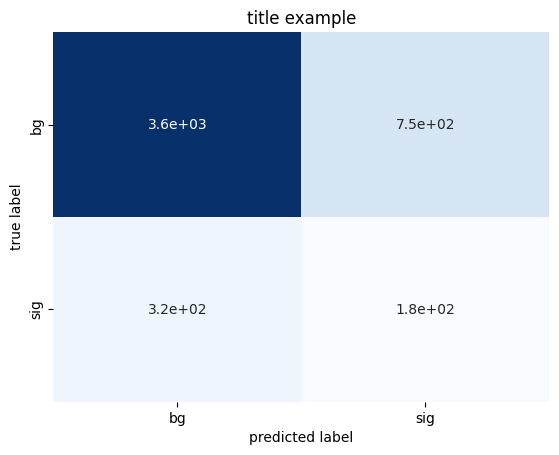

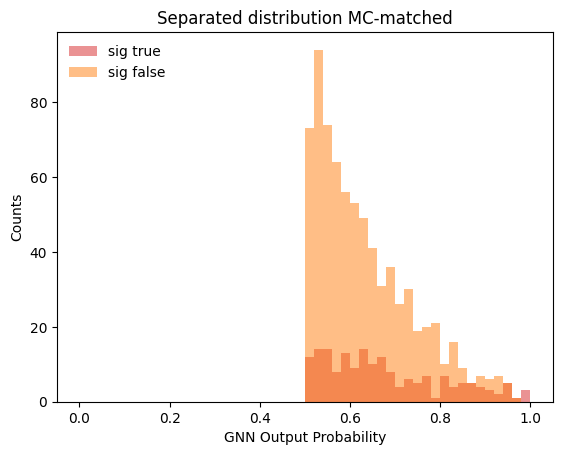

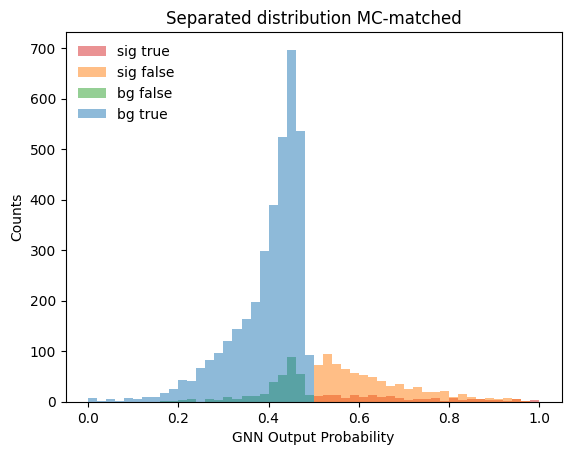

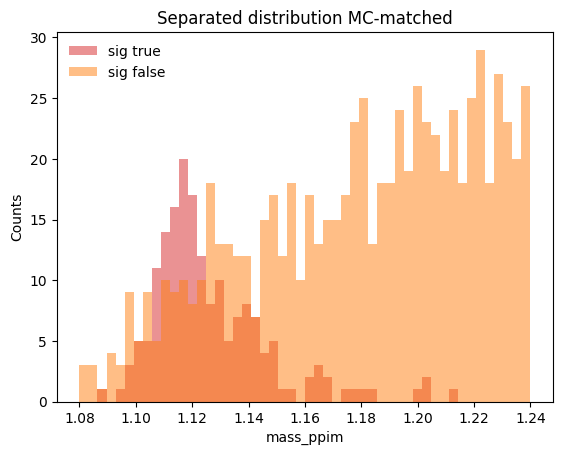

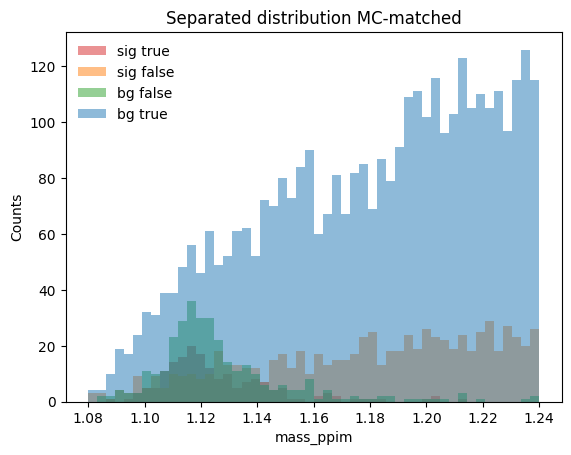

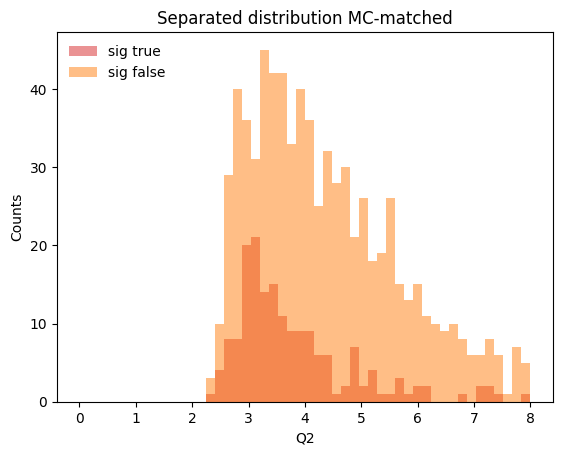

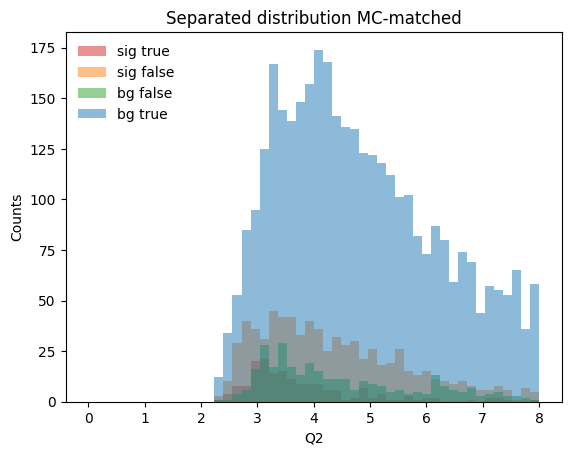

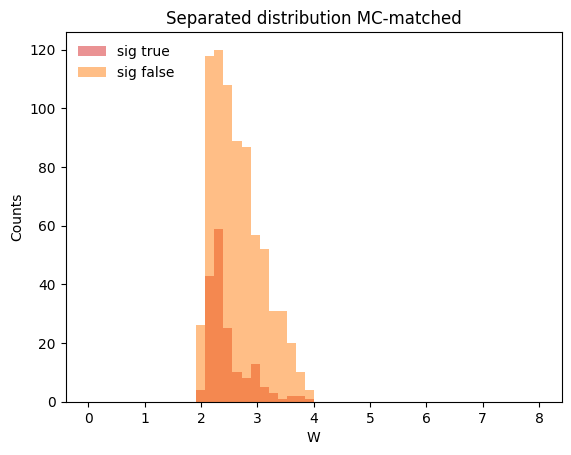

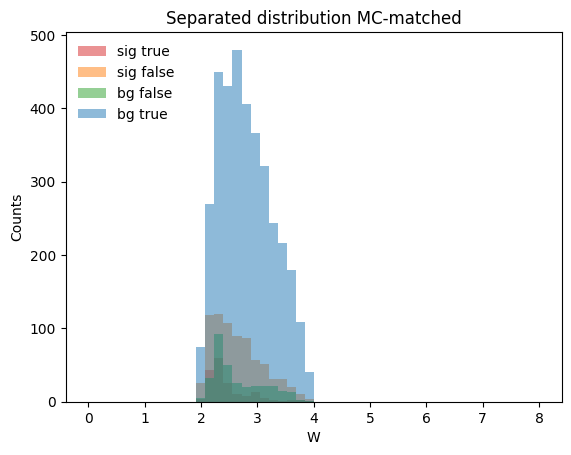

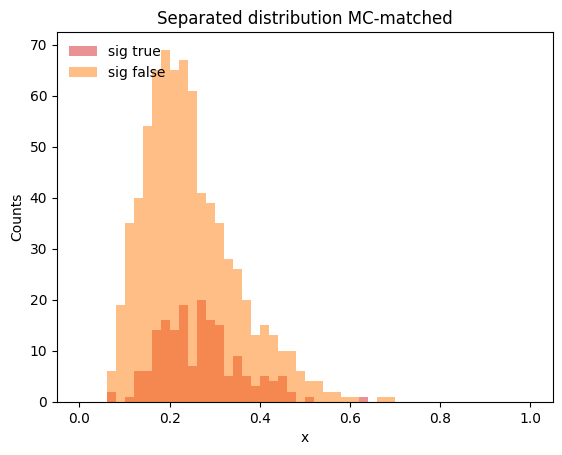

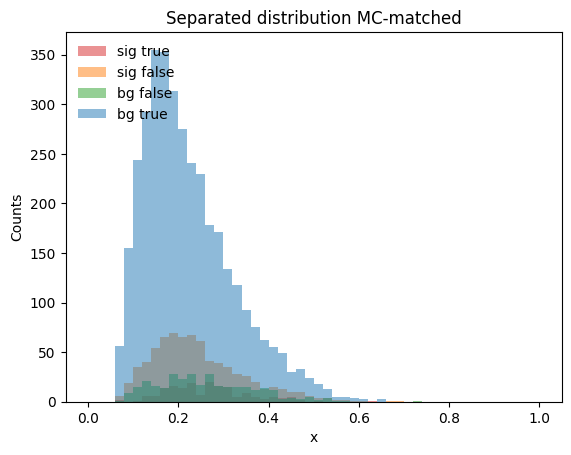

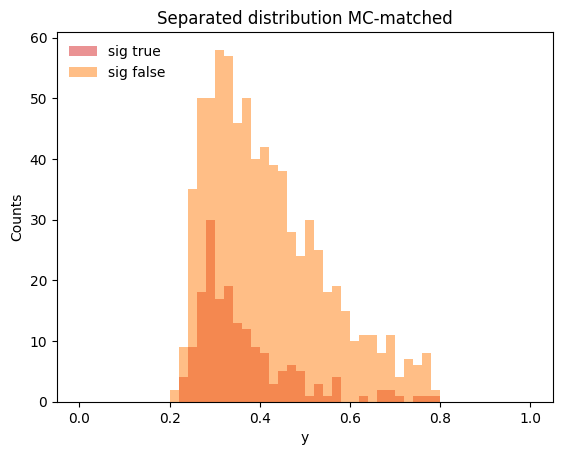

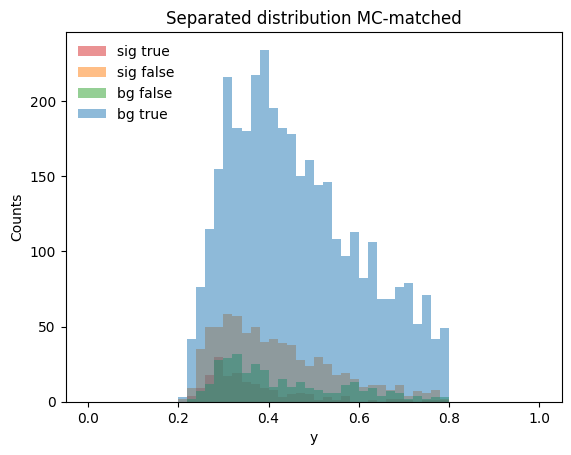

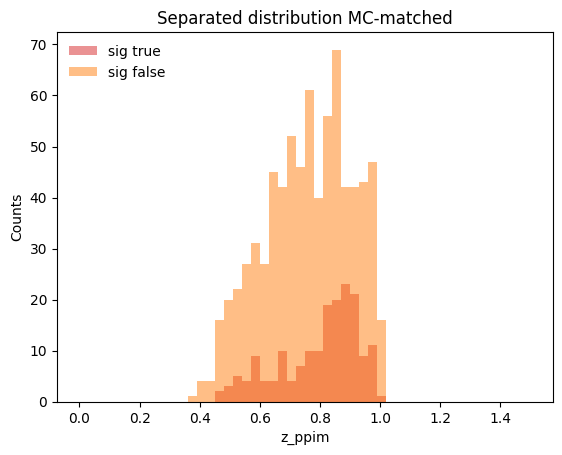

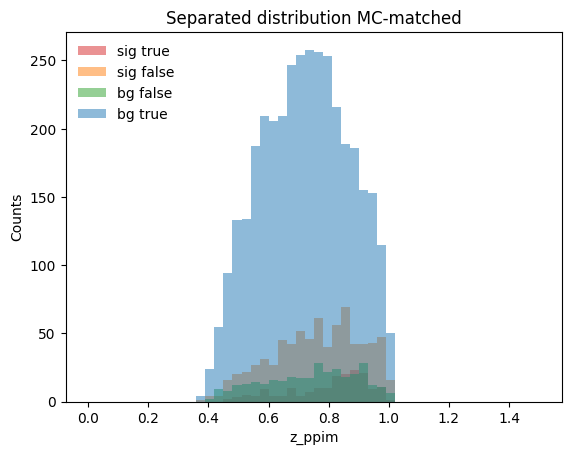

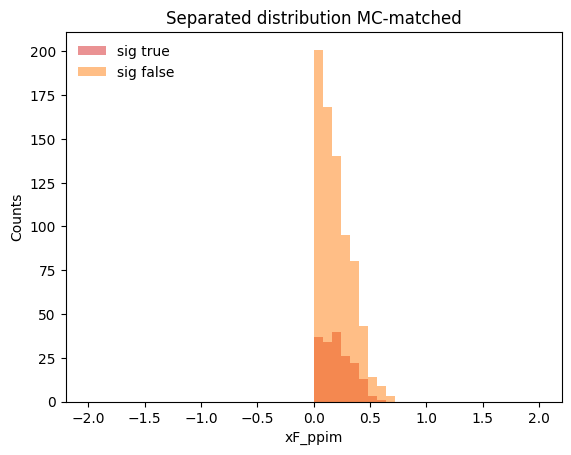

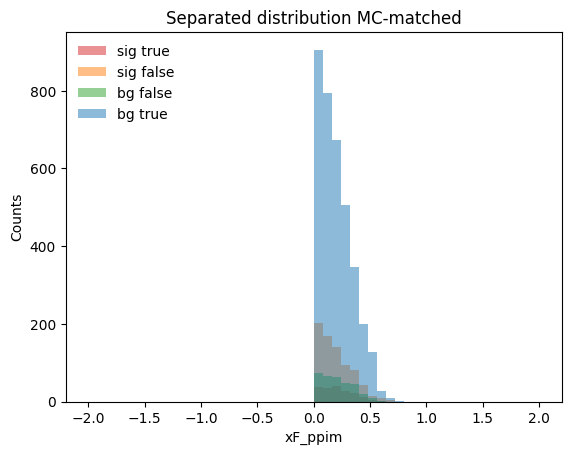

In [20]:
train_acc, train_loss, train_precision, train_recall, train_precision_n, train_recall_n, outputs, decisions, y_true = test(test_loader)
import sklearn
import seaborn as sns
cm = confusion_matrix(y_true,decisions,labels=[0,1])

tp = cm[1,1] 
fp = cm[0,1] # bg classified as signal is 0,1
fn = cm[1,0] # signal classified as bg  is 1,0
tn = cm[0,0]
        
precision = tp / (tp + fp) if tp+fp>0 else 0
recall = tp / (tp + fn) if tp+fn>0 else 0
precision_n = tn / (tn + fn) if tn+fn>0 else 0
recall_n = tn / (tn + fp) if tn+fp>0 else 0
precision2 = sklearn.metrics.precision_score(y_true, decisions)
recall2 = sklearn.metrics.recall_score(y_true,decisions)
print("precision2 = ",precision2)
print("precision = ",precision)
print("recall2 = ",recall2)
print("recall = ",recall)
print("precision_n = ",precision_n)
print("recall_n = ",recall_n)

def plot_matrix(cm, classes, title):
    ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, cbar=False)
    ax.set(title=title, xlabel="predicted label", ylabel="true label")
    
classes = ['bg', 'sig']
title = "title example"

plot_matrix(cm, classes, title)

# Get separated network output arrays
print("DEBUGGING: len(outputs)    = ",len(outputs))
print("DEBUGGING: outputs[0:10]   = ",outputs[0:10])
print("DEBUGGING: decisions[0:10] = ",decisions[0:10])
print("DEBUGGING: y_true[0:10]    = ",y_true[0:10])
outputs   = np.array([el.tolist() for el in outputs])
decisions = np.array([el.item() for el in decisions])
y_true    = np.array([el.item() for el in y_true])
print("DEBUGGING: AFTER CREATING np.arrays")
print("DEBUGGING: outputs[0:10]   = ",outputs[0:10])
print("DEBUGGING: decisions[0:10] = ",decisions[0:10])
print("DEBUGGING: y_true[0:10]    = ",y_true[0:10])
print("DEBUGGING: type(outputs)       = ",type(outputs))
print("DEBUGGING: type(decisions)     = ",type(decisions))
print("DEBUGGING: type(y_true)        = ",type(y_true))
print("DEBUGGING: np.shape(outputs)   = ",np.shape(outputs))
print("DEBUGGING: np.shape(decisions) = ",np.shape(decisions))
print("DEBUGGING: np.shape(y_true)    = ",np.shape(y_true))
print("DEBUGGING: np.shape(decisions==1) = ",np.shape(decisions==1))
outputs_sig_true  = outputs[:,1][np.logical_and(decisions==1,y_true==1)]
outputs_sig_false = outputs[:,1][np.logical_and(decisions==1,y_true==0)]
outputs_bg_false  = outputs[:,1][np.logical_and(decisions==0,y_true==1)]
outputs_bg_true   = outputs[:,1][np.logical_and(decisions==0,y_true==0)]

l_sig_true = []
l_sig_false = []
l_bg_false = []
l_bg_true = []
k_sig_true = []
k_sig_false = []
k_bg_false = []
k_bg_true = []
for i, data in enumerate(test_dataset):
    decision = decisions[i]
    y = y_true[i]
    kin = data.kinematics.tolist()
#     if len(kin)!=13: raise TypeError
    if decision==1 and decision==y:
        l_sig_true.append(data)
        k_sig_true.append(kin[0])#NOTE: Should add matching indices specification to data objects...
    elif decision==1 and decision!=y:
        l_sig_false.append(data)
        k_sig_false.append(kin[0])
    elif decision==0 and decision!=y:
        l_bg_false.append(data)
        k_bg_false.append(kin[0])
    elif decision==0 and decision==y:
        l_bg_true.append(data)
        k_bg_true.append(kin[0])
b_sig_true = torch_geometric.data.Batch().from_data_list(l_sig_true)
b_sig_false = torch_geometric.data.Batch().from_data_list(l_sig_false)
b_bg_false = torch_geometric.data.Batch().from_data_list(l_bg_false)
b_bg_true = torch_geometric.data.Batch().from_data_list(l_bg_true)
print(b_sig.x.shape)
print(b_sig.y.shape)
print(b_bg.x.shape)
print(b_bg.y.shape)

import matplotlib.pyplot as plt

def plot_data_separated(array_sig_true,array_sig_false,array_bg_false,array_bg_true,title=None,xlabel='index',nbins=50,low=-1.1,high=1.1):
    
    array_sig_true = array_sig_true.flatten()
    array_sig_false = array_sig_false.flatten()
    array_bg_false = array_bg_false.flatten()
    array_bg_true = array_bg_true.flatten()
    
    # Plot SIG ONLY distributions
    f = plt.figure()
    if title != None:
        plt.title(title)
    plt.title('Separated distribution MC-matched')
    plt.hist(array_sig_true, color='tab:red', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='sig true')
    plt.hist(array_sig_false, color='tab:orange', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='sig false')
#     plt.hist(array_bg_false, color='tab:green', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='bg false')
#     plt.hist(array_bg_true, color='tab:blue', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='bg true')
    plt.legend(loc='upper left', frameon=False)
    plt.ylabel('Counts')
    plt.xlabel(xlabel)
#     f.savefig(xlabel+'_separated_'+todays_date+'.pdf')

    # Plot SIG AND BG distributions
    f = plt.figure()
    if title != None:
        plt.title(title)
    plt.title('Separated distribution MC-matched')
    plt.hist(array_sig_true, color='tab:red', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='sig true')
    plt.hist(array_sig_false, color='tab:orange', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='sig false')
    plt.hist(array_bg_false, color='tab:green', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='bg false')
    plt.hist(array_bg_true, color='tab:blue', alpha=0.5, range=(low,high), bins=nbins, histtype='stepfilled', density=False, label='bg true')
    plt.legend(loc='upper left', frameon=False)
    plt.ylabel('Counts')
    plt.xlabel(xlabel)
#     f.savefig(xlabel+'_separated_'+todays_date+'.pdf')
    plt.show()
    
arr1 = b_sig_true.x
arr2 = b_sig_false.x
arr3 = b_bg_false.x
arr4 = b_bg_true.x
    
# # Plot data separated distributions
# plot_data_separated(arr1[:,0],arr2[:,0],arr3[:,0],arr4[:,0],xlabel="pT")
# plot_data_separated(arr1[:,1],arr2[:,1],arr3[:,1],arr4[:,1],xlabel="phi")
# plot_data_separated(arr1[:,2],arr2[:,2],arr3[:,2],arr4[:,2],xlabel="theta")
# plot_data_separated(arr1[:,3],arr2[:,3],arr3[:,3],arr4[:,3],xlabel="beta")
# plot_data_separated(arr1[:,4],arr2[:,4],arr3[:,4],arr4[:,4],xlabel="chi2")
# plot_data_separated(arr1[:,5],arr2[:,5],arr3[:,5],arr4[:,5],xlabel="pid")
# plot_data_separated(arr1[:,6],arr2[:,6],arr3[:,6],arr4[:,6],xlabel="status")

print(len(k_sig_true))
print(len(k_sig_true[1]))
arr1 = np.array(k_sig_true)
arr2 = np.array(k_sig_false)
arr3 = np.array(k_bg_false)
arr4 = np.array(k_bg_true)
print(type(arr1))
print(type(arr1[0]))
print(arr1.shape)
print(arr1[0].shape)
#mass_index, Q2_index, W_index, x_index, y_index, z_index, xF_index, mc_pid_pa_p_index, mc_pid_ppa_p_index, mc_idx_pa_p_index, mc_idx_ppa_p_index, mc_idx_pa_pim_index, mc_label_index
# Plot data separated distributions
plot_data_separated(outputs_sig_true,outputs_sig_false,outputs_bg_false,outputs_bg_true,xlabel="GNN Output Probability",low=0.0,high=1.0)
plot_data_separated(arr1[:,10],arr2[:,10],arr3[:,10],arr4[:,10],xlabel="mass_ppim",low=1.08,high=1.24)
plot_data_separated(arr1[:,4],arr2[:,4],arr3[:,4],arr4[:,4],xlabel="Q2",low=0.0,high=8.0)
plot_data_separated(arr1[:,5],arr2[:,5],arr3[:,5],arr4[:,5],xlabel="W",low=0.0,high=8.0)
plot_data_separated(arr1[:,6],arr2[:,6],arr3[:,6],arr4[:,6],xlabel="x",low=0.0,high=1.0)
plot_data_separated(arr1[:,7],arr2[:,7],arr3[:,7],arr4[:,7],xlabel="y",low=0.0,high=1.0)
plot_data_separated(arr1[:,8],arr2[:,8],arr3[:,8],arr4[:,8],xlabel="z_ppim",low=0.0,high=1.5)
plot_data_separated(arr1[:,9],arr2[:,9],arr3[:,9],arr4[:,9],xlabel="xF_ppim",low=-2.0,high=2.0)




In [14]:
# Train model batch size 32 lr 0.001
nepochs = 5
for epoch in range(nepochs):
    print("BEFORE TRAIN()")
    train()
    print("BEFORE TEST(TRAIN_LOADER)")
    train_acc, train_loss = test(train_loader)
    print("BEFORE TEST(VAL_LOADER)")
    val_acc, val_loss = test(val_loader)
    print("Train acc: ",train_acc," loss: ",train_loss)
    print("Val   acc: ",val_acc,  " loss: ",val_loss)

BEFORE TRAIN()


1210it [00:24, 49.27it/s]


BEFORE TEST(TRAIN_LOADER)


100%|█████████████████████████████████████| 1210/1210 [00:09<00:00, 133.30it/s]


ValueError: too many values to unpack (expected 2)

In [95]:
# Train model batch size 8 lr 0.01
nepochs = 5
for epoch in range(nepochs):
    print("BEFORE TRAIN()")
    train()
    print("BEFORE TEST(TRAIN_LOADER)")
    train_acc, train_loss = test(train_loader)
    print("BEFORE TEST(VAL_LOADER)")
    val_acc, val_loss = test(val_loader)
    print("Train acc: ",train_acc," loss: ",train_loss)
    print("Val   acc: ",val_acc,  " loss: ",val_loss)

BEFORE TRAIN()
BEFORE TEST(TRAIN_LOADER)
BEFORE TEST(VAL_LOADER)
Train acc:  0.6991438745359497  loss:  0.07601341395124382
Val   acc:  0.6980503081119305  loss:  0.07630892167947355
BEFORE TRAIN()
BEFORE TEST(TRAIN_LOADER)
BEFORE TEST(VAL_LOADER)
Train acc:  0.7032477207869283  loss:  0.07579740803833365
Val   acc:  0.7007778563491261  loss:  0.0760859340980253
BEFORE TRAIN()
BEFORE TEST(TRAIN_LOADER)
BEFORE TEST(VAL_LOADER)
Train acc:  0.7001161704169507  loss:  0.07569918957618095
Val   acc:  0.6996666329932316  loss:  0.07610895434031885
BEFORE TRAIN()
BEFORE TEST(TRAIN_LOADER)
BEFORE TEST(VAL_LOADER)
Train acc:  0.7026037326060055  loss:  0.07566766396838884
Val   acc:  0.6982523487220932  loss:  0.07625823542257429
BEFORE TRAIN()
BEFORE TEST(TRAIN_LOADER)
BEFORE TEST(VAL_LOADER)
Train acc:  0.7036391645831755  loss:  0.07560701737655974
Val   acc:  0.6997676532983129  loss:  0.07606107426455604


In [151]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ys = None
# for data in train_loader:
#     if ys is None: ys = data.y
#     else: ys = torch.concatenate([ys,data.y])
# counts = torch.unique(ys,return_counts=True)[1]
# weights = counts / len(ys)
# weights = np.power(weights,-1)
# weight = torch.tensor([weights[idx] for idx in torch.squeeze(ys)]).to(device)
# print("DEBUGGING: counts = ",torch.unique(ys,return_counts=True))
# print("DEBUGGING: weight = ",weight)
# criterion = torch.nn.BCELoss(weight=weight)

def train(loader):
    model.train()
    loss_tot = 0.0
#     print("DEBUGGING: beginning train(loader) len(loader) = ",len(loader))
    for data in loader:  # Iterate in batches over the training dataset.
        counts = torch.unique(data.y,return_counts=True)[1]
#         print("DEBUGGING: torch.unique(data.y,return_counts=True) = ",torch.unique(data.y,return_counts=True))#DEBUGGING
        weights = counts / len(data.y)
        weights = np.power(weights,-1)
#         print("DEBUGGING: data.y = ",data.y)
        weight = torch.tensor([weights[idx] for idx in torch.squeeze(data.y)]).to(device)

        optimizer.zero_grad()  # Clear gradients.
    
        criterion = torch.nn.BCELoss(weight=weight)#weight=weight
#         criterion = torch.nn.NLLLoss()
        
        data = data.to(device)#NOTE: ADDED
#         print("-> data.x.max() = ",data.x.max())
        out = torch.squeeze(model(data.x, data.edge_index, data.batch)) #NOTE: REMOVED TORCH.SQUEEZE 2/28/23  # Perform a single forward pass.
#         print("DEBUGGING: out = ",out)#DEBUGGING
#         print("DEBUGGING: data.x = ",data.x)
#         print("DEBUGGING: data.y.float() = ",data.y.float())#DEBUGGING
#         print("DEBUGGING: out.shape = ",out.shape," data.y.float().shape = ",data.y.float().shape)#DEBUGGING
        loss = criterion(out, data.y.float())  # Compute the loss.
#         loss = criterion(out, data.y)  # Compute the loss.
#         print("DEBUGGING: out = ",out)
#         print("DEBUGGING: pred = ",out.round())
#         print("DEBUGGING: data.y = ",data.y)
#         print("DEBUGGING: loss.item() = ",loss.item())
#         break
#         pred = torch.round(out)
#         correct = int((pred == data.y).sum())  # Check against ground-truth labels.
#         print("DEBUGGING: correct = ",correct)
        
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
#         optimizer.zero_grad()  # Clear gradients. #NOTE: COMMENTED OUT BECAUSE PUT ABOVE FOR DEBUGGING
#         break
        loss_tot += loss.item()
    return loss_tot / len(loader.dataset)


def val(loader):
    model.eval()

    correct = 0
    loss_tot = 0.0
    with torch.no_grad():
    #     print("DEBUGGING: beginning val(loader) len(loader) = ",len(loader))
        for data in loader:  # Iterate in batches over the training/test dataset.
            counts = torch.unique(data.y,return_counts=True)[1]
            weights = counts / len(data.y)
            weights = np.power(weights,-1)
            weight = torch.tensor([weights[idx] for idx in torch.squeeze(data.y)]).to(device)
            criterion = torch.nn.BCELoss(weight=weight)#weight=weight
#             criterion = torch.nn.NLLLoss()

            data = data.to(device)#NOTE: ADDED
    #         print("DEBUGGING: data.batch = ",data.batch)
            out = torch.squeeze(model(data.x, data.edge_index, data.batch)) #NOTE: REMOVED TORCH.SQUEEZE 2/28/23
    #         print("-> data.x.max() = ",data.x)
    #         print("DEBUGGING: out = ",out)
    #         print("DEBUGGING: pred = ",torch.round(out))
            loss = criterion(out, data.y.float())  # Compute the loss.
#             loss = criterion(out, data.y)  # Compute the loss.
    #         pred = out.argmax(dim=1)  # Use the class with highest probability.
            pred = torch.round(out) #NOTE: JUST FOR USING BCELOSS -> ARGMAX COLLAPSES TO A ONE ELEMENT TENSOR
#             print("-> data.x.max() = ",data.x.max())
#             print("DEBUGGING: weights =")
#             print("DEBUGGING: out = ",out)
#             print("DEBUGGING: pred = ",pred)
#             print("DEBUGGING: data.y = ",data.y)
#             print("DEBUGGING: loss.item() = ",loss.item())

            correct += int((pred == data.y).sum())  # Check against ground-truth labels.
#             print("DEBUGGING: correct = ",correct)
            loss_tot += loss.item()
        return correct / len(loader.dataset), loss_tot / len(loader.dataset)  # Derive ratio of correct predictions.

nepochs = 100
for epoch in range(1, nepochs+1):
    train_loss_tot = train(train_loader)
    train_acc, train_loss = val(train_loader)
    val_acc, val_loss = val(val_loader)
    print("DEBUGGING: train_loss_tot = ",train_loss_tot)#DEBUGGING
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f} Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f} Loss: {val_loss:.4f}')
    
test_acc, test_loss = val(test_loader)
print(f'Test Acc: {train_acc:.4f} Loss: {train_loss:.4f}')

Defaulting to user installation because normal site-packages is not writeable


In [33]:
#NOTE: COULD DEPLOY THIS ON IFARM...

#TODO:
# * ADD LEARNING RATE STEPPING INTO PL
# * CONVERT MODEL TO SEQUENTIAL SO YOU CAN SPECIFY NUMBER OF GRAPH AND LINEAR LAYERS AND POOLING TYPE
# * WRITE GIN/MLP MODELS
# * FIGURE OUT HOW TO INTEGRATE WITH HYPEROPTIMIZATION
# * FIGRE OUT HOW TO INTEGRATE WITH MLFLOW OR SOME OTHER TRACKING PACKAGE

In [11]:
#TODO: IMPLEMENT WITH PYTORCH-LIGHTNING
import torch
from torchmetrics import Accuracy
from torch.utils.data import random_split

import pytorch_lightning as pl
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger

class PLModel(pl.LightningModule):

    def __init__(self,
                 model_class = None,
                 model_class_args = [],
                 model_class_kwargs = {},
                 criterion = None,
                 optimizer = None,
                 optimizer_kwargs = None,
                 task = "binary",
                 num_classes = 1,
                 weight = True,
                 dataset_class = None,
                 ds_args = [],
                 ds_kwargs = {},
                 lengths = [1.0],
                 dataloader_class = None,
                 train_batch_size = 64,
                 val_batch_size = 64,
                 test_batch_size = 64,
                 num_workers = 4
                ):
        super(PLModel, self).__init__()
        self.criterion = criterion if criterion is not None else F.binary_cross_entropy
        self.optimizer = optimizer
        self.optimizer_kwargs = optimizer_kwargs
        self.task = task
        if self.task!='binary': raise TypeError('PLModel: Only binary classification implemented so far')
        self.num_classes = num_classes #NOTE: FOR BCELoss SHOULD HAVE NUM_CLASSES=1.
        self.weight = weight #NOTE: Whether or not to use loss weighting on batch basis
        self.dataset_class = dataset_class
        self.ds_args = ds_args
        self.ds_kwargs = ds_kwargs
        self.lengths = lengths
        self.dataloader_class = dataloader_class
        self.train_batch_size = train_batch_size
        self.val_batch_size = val_batch_size
        self.test_batch_size = test_batch_size
        self.num_workers = num_workers
        
        # Init random class attributes
        self.dataset = None
        self.ds_train = None
        self.ds_val = None
        self.ds_test = None
        
        self.train_accuracy = Accuracy(task=self.task, num_classes=self.num_classes)
        self.val_accuracy = Accuracy(task=self.task, num_classes=self.num_classes)
        self.test_accuracy = Accuracy(task=self.task, num_classes=self.num_classes)
        
        self.model = model_class(*model_class_args,**model_class_kwargs)

    def training_step(self, batch, batch_idx):
        x = torch.squeeze(self.model(batch.x, batch.edge_index, batch.batch))
        counts = torch.pow(torch.unique(batch.y,return_counts=True)[1] / len(batch.y), -1) if self.weight else None
        weight = torch.tensor([counts[idx] for idx in torch.squeeze(batch.y)]).to(x.device) if self.weight else None #NOTE: THIS ONLY WORKS FOR BINARY CLASSIFICATION WITH BCELOSS
        loss = self.criterion(x, batch.y.float(), weight=weight)
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', self.train_accuracy, prog_bar=True, batch_size=self.train_batch_size)
        return loss
    
    @torch.no_grad()
    def validation_step(self, batch, batch_idx):
        x = torch.squeeze(self.model(batch.x, batch.edge_index, batch.batch))
        counts = torch.pow(torch.unique(batch.y,return_counts=True)[1] / len(batch.y), -1) if self.weight else None
        weight = torch.tensor([counts[idx] for idx in torch.squeeze(batch.y)]).to(x.device) if self.weight else None #NOTE: THIS ONLY WORKS FOR BINARY CLASSIFICATION WITH BCELOSS
        loss = self.criterion(x, batch.y.float(), weight=weight)
        preds = x.round() #NOTE: ONLY USE FOR BINARY CLASSIFICATION
        self.val_accuracy.update(preds, batch.y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log('val_loss', loss, prog_bar=True, batch_size=self.val_batch_size)
        self.log('val_acc', self.val_accuracy, prog_bar=True, batch_size=self.val_batch_size)
        return loss
    
    @torch.no_grad()
    def test_step(self, batch, batch_nb):
        x = torch.squeeze(self.model(batch.x, batch.edge_index, batch.batch))
        counts = torch.pow(torch.unique(batch.y,return_counts=True)[1] / len(batch.y), -1) if self.weight else None
        weight = torch.tensor([counts[idx] for idx in torch.squeeze(batch.y)]).to(x.device) if self.weight else None #NOTE: THIS ONLY WORKS FOR BINARY CLASSIFICATION WITH BCELOSS
        loss = self.criterion(x, batch.y.float(), weight=weight)
        preds = x.round() #NOTE: ONLY USE FOR BINARY CLASSIFICATION
        self.val_accuracy.update(preds, batch.y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log('test_loss', loss, prog_bar=True, batch_size=self.test_batch_size)
        self.log('test_acc', self.test_accuracy, prog_bar=True, batch_size=self.test_batch_size)
        return loss

    def configure_optimizers(self):
        if self.optimizer is not None and self.optimizer_kwargs is not None:
            return self.optimizer(self.parameters(), **self.optimizer_kwargs)
        else:
            return torch.optim.Adam(self.parameters(), lr=0.01)
            
    def prepare_data(self): #NOTE: DO NOT MAKE ANY STATE ASSIGNMENTS HERE, JUST DOWNLOAD THE DATA IF NEEDED
        pass

    def setup(self, stage=None): #NOTE: THIS RUNS ACROSS ALL GPUS
        # Assign train/val/test datasets for use in dataloaders
        if self.dataset is None:
            self.dataset = self.dataset_class(*self.ds_args,**self.ds_kwargs) #NOTE: NEEDED KWARGS datasetclass ds_args, ds_kwargs, lengths
        if len(self.lengths)==2 and self.ds_train is None and self.ds_val is None:
            self.ds_train, self.ds_val = random_split(self.dataset, self.lengths)
        elif len(self.lengths)==3 and self.ds_train is None and self.ds_val is None:
            self.ds_train, self.ds_val, self.ds_test = random_split(self.dataset, self.lengths)

    def train_dataloader(self):
        return self.dataloader_class(self.ds_train, batch_size=self.train_batch_size, shuffle=True, num_workers=self.num_workers) #NOTE: NEEDED KWARGS dataloader_class train_batch_size val test...

    def val_dataloader(self):
        return self.dataloader_class(self.ds_val, batch_size=self.val_batch_size, shuffle=False, num_workers=self.num_workers)

    def test_dataloader(self):
        return self.dataloader_class(self.ds_test, batch_size=self.test_batch_size, shuffle=False, num_workers=self.num_workers)
            


In [13]:
import torch
from torch_geometric.loader import DataLoader
import torch_geometric.transforms as T
transform = T.Compose([T.ToUndirected(),T.NormalizeFeatures()]) #T.AddSelfLoops(),

plmodel = PLModel(
         model_class = GCN,
         model_class_args = [],
         model_class_kwargs = {'in_channels':dataset.num_node_features,'hidden_channels':64,'out_channels':1},
         criterion = torch.nn.functional.binary_cross_entropy,
         optimizer = torch.optim.Adam,
         optimizer_kwargs = {'lr':0.01},
         task = 'binary',
         num_classes = 1,
         weight = True,
         dataset_class = MyOwnDataset,
         ds_args = ['/work/clas12/users/mfmce/pyg_datasets/'],
         ds_kwargs = {'transform':transform, 'pre_transform':None, 'pre_filter':None},
         lengths = [0.8,0.1,0.1],
         dataloader_class = DataLoader,
         train_batch_size = 16,
         val_batch_size = 16,
         test_batch_size = 16,
         num_workers = 4
        )

print(type(plmodel))
print(type(plmodel.model))

<class '__main__.PLModel'>
<class '__main__.GCN'>


In [17]:
trainer = Trainer(
    default_root_dir="./", #NOTE: PL AUTOMATICALLY SAVES PL CHECKPOINT TO PWD UNLESS THIS OPTION IS DIFFERENT
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=3,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=CSVLogger(save_dir="logs/"),
#     deterministic=True
)
trainer.fit(plmodel)

#NOTE: NEED TO FIGURE OUT HOW TO LOAD BEST MODEL
script = plmodel.to_torchscript() #NOTE: extra method needed for pl

# save for use in production environment
torch.jit.save(script, "model.pt")

#FOR INTEGRATING WITH MLFLOW
# from pytorch_lightning.loggers import MLFlowLogger

# mlf_logger = MLFlowLogger(experiment_name="lightning_logs", tracking_uri="file:./ml-runs")
# trainer = Trainer(logger=mlf_logger)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name           | Type           | Params
--------------------------------------------------
0 | train_accuracy | BinaryAccuracy | 0     
1 | val_accuracy   | BinaryAccuracy | 0     
2 | test_accuracy  | BinaryAccuracy | 0     
3 | model          | GCN            | 17.4 K
--------------------------------------------------
17.4 K    Trainable params
0         Non-trainable params
17.4 K    Total params
0.070     Total estimated model params size (MB)
SLURM auto-requeueing enabled. Setting signal handlers.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


AttributeError: 'GCN' object has no attribute 'to_torchscript'

In [18]:
trainer.test()

/w/hallb-scshelf2102/clas12/users/mfmce/venv/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:124: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at logs/lightning_logs/version_15/checkpoints/epoch=2-step=14073.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Loaded model weights from checkpoint at logs/lightning_logs/version_15/checkpoints/epoch=2-step=14073.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc                    0.0
        test_loss           1.3851436376571655
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/w/hallb-scshelf2102/clas12/users/mfmce/venv/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: The ``compute`` method of metric BinaryAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)


[{'test_loss': 1.3851436376571655, 'test_acc': 0.0}]

In [14]:
# Train model
from pytorch_lightning.loggers import MLFlowLogger
pl.seed_everything(72, workers=True)
mlf_logger = MLFlowLogger(experiment_name="lightning_logs", tracking_uri="file:./ml-runs")
trainer = Trainer(
    default_root_dir="./", #NOTE: PL AUTOMATICALLY SAVES PL CHECKPOINT TO PWD UNLESS THIS OPTION IS DIFFERENT
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,
    max_epochs=3,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
#     logger=CSVLogger(save_dir="logs/"),
    deterministic=True, #NOTE: For reproducibility use pytorch_lightning.seed_everything and this
    logger=mlf_logger
)
trainer.fit(plmodel)

# Test model - pl automatically saves best and last checkpoints
trainer.test(ckpt='best')

# save for use in production environment
script = plmodel.to_torchscript() #NOTE: Different method for pl
torch.jit.save(script, "model.pt")

[rank: 0] Global seed set to 72
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Experiment with name lightning_logs not found. Creating it.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name           | Type           | Params
--------------------------------------------------
0 | train_accuracy | BinaryAccuracy | 0     
1 | val_accuracy   | BinaryAccuracy | 0     
2 | test_accuracy  | BinaryAccuracy | 0     
3 | model          | GCN            | 17.4 K
--------------------------------------------------
17.4 K    Trainable params
0         Non-trainable params
17.4 K    Total params
0.070     Total estimated model params size (MB)
SLURM auto-requeueing enabled. Setting signal handlers.


INFO: self.processed_paths =  ['/work/clas12/users/mfmce/pyg_datasets/processed/data.pt']


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


TypeError: test() got an unexpected keyword argument 'ckpt'

In [22]:
!pip install -U 'mlflow>=1.0.0'

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 16.7 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 36.0 MB 138.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 75.2 MB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 100.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 129.2 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 44.8 MB/s  eta 0:00:01
     |████████████████████████████████| 101 kB 138.6 MB/s ta 0:00:01
     |████████████████████████████████| 42 kB 85.1 MB/s  eta 0:00:01
     |████████████████████████████████| 147 kB 136.5 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 137.4 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 88.4 MB/s  eta 0:00:01
     |███████████████

In [29]:
import os.path as osp

import torch
import torch.nn.functional as F

import torch_geometric
import torch_geometric.transforms as T
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MLP, GINConv, global_add_pool

class GIN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.convs = torch.nn.ModuleList()
        for _ in range(5):
            mlp = MLP([in_channels, 32, 32])
            self.convs.append(GINConv(mlp, train_eps=False))
            in_channels = 32

        self.mlp = MLP([32, 32, out_channels], norm=None, dropout=0.5)

    def forward(self, x, edge_index, batch):
        for conv in self.convs:
            x = conv(x, edge_index).relu()
        x = global_add_pool(x, batch)
        return self.mlp(x)


model = GIN(dataset.num_features, dataset.num_classes).to(device)

# Compile the model into an optimized version:
# Note that `compile(model, dynamic=True)` does not work yet in PyTorch 2.0, so
# we use `transforms.Pad` and static compilation as a current workaround.
# See: https://github.com/pytorch/pytorch/issues/94640
# model = torch_geometric.compile(model)

# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# def train():
#     model.train()

#     total_loss = 0
#     for data in train_loader:
#         data = data.to(device)
#         optimizer.zero_grad()
#         out = model(data.x, data.edge_index, data.batch)
#         loss = F.cross_entropy(out, data.y)
#         loss.backward()
#         optimizer.step()
#         total_loss += float(loss) * data.num_graphs
#     return total_loss / len(train_loader.dataset)


# @torch.no_grad()
# def test(loader):
#     model.eval()

#     total_correct = 0
#     for data in loader:
#         data = data.to(device)
#         pred = model(data.x, data.edge_index, data.batch).argmax(dim=-1)
#         print(pred)
#         total_correct += int((pred == data.y).sum())
#     return total_correct / len(loader.dataset)


# for epoch in range(1, 101):
#     loss = train()
#     train_acc = test(train_loader)
#     test_acc = test(val_loader)
#     print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_acc:.4f}, '
#           f'Test: {test_acc:.4f}')
#     break